# Scikit learn

Recuerden que tiene una muy buena [documentación](https://scikit-learn.org/stable/user_guide.html).

Vimos que en general, los objetos de sklearn tienen los métodos:

- fit
- transform o predict

Vamos a trabajar con un dataset sacado de una competencia de data science para aprender a utilizar skitlearn.

Montamos drive 

In [169]:
#from google.colab import drive # La usamos para montar nuestra unidad de Google Drive
#drive.mount('/content/drive') # Montamos nuestra unidad de Google Drive

Vamos a trabajar con un dataset que contiene datos sobre la actividad de los usuarios que visitan un sitio web de ecommerce.

Las columnas del dataset son:

- id: Id del usuario 
- administrative: Número de veces que el usuario visito la sección "administrative"
- administrative_duration: Tiempo que el usuario paso en la sección administrative
- informational: Número de veces que el usuario visitó la sección "informational"
- informational_duration: Tiempo que el usuario paso en la sección informational
- productrelated: Número de veces que el usuario visitó la sección "products related"
- productrelated_duration: Tiempo que el usuario pasó en la sección 
- bouncerates: Porcentaje de visitantes que entran a la página e inmediatamente la dejan sin interactuar con la misma. Esta metrica solo se tiene en cuenta si es la primer página que se visitó del sitio web.
- exitrates: De la cantidad total de visitas a las páginas del sitio web, el porcentaje de usuarios que lo abandonaron en esta página. Esto es, el  porcentaje de usuarios que su última visita al sitio fué en esta página.
- pagevalues: Este es el valor promedio del sitio web, indica la contribución que este sitio web hizo al visitante que llega a la página o sección de compra final. Más detalles sobre pageValues: https://support.google.com/analytics/answer/2695658?hl=en
-  specialday: Es una fecha especial o no (1 o 0)
- operatingsystems: Sistema operativo
- browser: Nombre del navegador
- region: Region geográfica del usuario
- traffictype: Tipo de tráfico web
- visitortype: Nuevo o uno que retorno al sitio
- Weekend: 1 si es fin de semana y 0 en otro caso
- revenue: 1 si el usuario hizo una compra y 0 en otro caso

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Leemos el csv:

In [171]:
#df = pd.read_csv('/content/drive/MyDrive/Programa Académico/Clases/Feature eng/online-shoppers-intention.csv')

In [172]:
df = pd.read_csv("online-shoppers-intention.csv")

In [173]:
df.head()

,id,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,revenue
0,1.0,0.0,0.0,0.0,NaN,5.0,81.083333,0.04,0.050000,0.0,0.0,Dec,NaN,2.0,1.0,2.0,New_Visitor,0.0,0.0
1,2.0,0.0,0.0,0.0,0.0,3.0,189.000000,NaN,0.066667,0.0,0.0,Mar,NaN,2.0,8.0,1.0,Returning_Visitor,0.0,0.0
2,3.0,0.0,0.0,1.0,132.0,8.0,445.000000,0.00,0.014286,0.0,0.0,Mar,NaN,2.0,4.0,14.0,Returning_Visitor,1.0,0.0
3,4.0,NaN,0.0,0.0,0.0,3.0,0.000000,0.20,0.200000,0.0,0.0,Mar,NaN,8.0,2.0,1.0,Returning_Visitor,0.0,0.0
4,5.0,0.0,0.0,0.0,0.0,4.0,14.000000,0.10,0.150000,0.0,0.0,Mar,3.0,2.0,1.0,1.0,Returning_Visitor,0.0,0.0


¿ Cuántas filas y columnas tiene el dataset ?

In [174]:
#COMPLETAR
df.shape

(8631, 19)

## Valores nulos

¿ Hay valores nulos en el dataset ?

¿ Cuántos por cada columna ?

In [175]:
df.isna().sum()

id                            0
Administrative             1295
Administrative_Duration       0
Informational                 0
Informational_Duration     2589
ProductRelated                0
ProductRelated_Duration       0
BounceRates                 863
ExitRates                   432
PageValues                    0
SpecialDay                    0
Month                         0
OperatingSystems           6905
Browser                       0
Region                       86
TrafficType                   0
VisitorType                 259
Weekend                       0
revenue                       0
dtype: int64

En porcentajes:

In [176]:
round(df.isnull().mean() * 100, 2)

id                          0.00
Administrative             15.00
Administrative_Duration     0.00
Informational               0.00
Informational_Duration     30.00
ProductRelated              0.00
ProductRelated_Duration     0.00
BounceRates                10.00
ExitRates                   5.01
PageValues                  0.00
SpecialDay                  0.00
Month                       0.00
OperatingSystems           80.00
Browser                     0.00
Region                      1.00
TrafficType                 0.00
VisitorType                 3.00
Weekend                     0.00
revenue                     0.00
dtype: float64

Tenemos valores nulos en varias columnas. En algunas el porcentaje es muy alto (80% en operating systems) y en otras muy bajo (1% en region).

A simple vista:

1) ¿Descartarían alguna columna por completo?

2) ¿Descartarían las filas con nulos en alguna de las columnas?

3) ¿En qué casos creen que conviene utilizar imputación univariante y en cuáles multivariante ?

Vamos a analizar el dataset y buscar una respuesta a estas preguntas.

### Columna administrative

Sabemos que la columna **administrative** que tiene 15% de valores nulos nos dice:

*Número de veces que el usuario visito la sección "administrative"*

Pero la columna **administrative_duration** está relacionada a la misma: 

*Tiempo que el usuario paso en la sección administrative*

tiene 0 nulos.

En este caso, al comprender el problema, podemos suponer que cuando  administrative duration tiene un valor > 0, la variable administrative debería ser = 1.

Antes de utilizar esta condición para completar nulos en la columna, vamos a verificar que se cumpla la condición.

¿ Existen casos en que Administrative_Duration sea mayor a 0 y Administrative igual a 0 ?


In [177]:
df[(df.Administrative_Duration > 0) & (df.Administrative == 0)].shape[0]

0

Vemos que no hay casos, por lo tanto podemos asumir que cuando Administrative_Duration es > 0 entonces Administrative es 1.

Ahora.. 

¿ Qué pasa si Administrative_Duration es = 0 ? 

¿ Hay casos en que Administrative_Duration sea = 0 y Administrative = 1 ?

In [178]:
df[(df.Administrative_Duration == 0) & (df.Administrative == 1)].shape[0]

78

Tenemos 78 casos. No parecen ser muchos.

Ahora, ¿ cuántas veces sucede lo contrario ? (administrative duration == 0 y administrative == 0)

In [179]:
df[(df.Administrative_Duration == 0) & (df.Administrative == 0)].shape[0]

3460

En la mayoría de los casos, si administrative_duration es = 0, administrative también lo es. 

Después de haber analizado el problema, decidimos:

- Cuando administrative duration sea 0: Vamos a completar los nulos de Administrative con 0.

- Cuando administrative duration sea > 0: Vamos a completar los nulos de administrative con 1.

¿ Cómo hacemos esto en python ?

In [180]:
# Mask
condition_1 = df.Administrative_Duration == 0
condition_2 = df.Administrative_Duration > 0

df.loc[condition_1, 'Administrative'].head()

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: Administrative, dtype: float64

In [181]:
df.loc[condition_2, 'Administrative'].head()

6      4.0
7     14.0
8      2.0
9      1.0
11     5.0
Name: Administrative, dtype: float64

Utilizamos las mascaras combinadas con el método .fillna() de pandas.

In [182]:
df.loc[condition_1, 'Administrative'] = df.loc[condition_1, 'Administrative'].fillna(0) # Cuando la duracion es 0
df.loc[condition_2, 'Administrative'] = df.loc[condition_2, 'Administrative'].fillna(1) # Cuando la duracion es > 0

In [183]:
df.Administrative.isna().sum()

0

Ahora la columna administrative no tiene más nulos. Los imputamos teniendo en cuenta el valor de otra columna (y entendiendo el problema)

### Informational duration

En esta columna tenemos un 30% de valores nulos.

En la columna informational, no hay nulos. Esta columna nos puede llegar a servir para encontrar alguna condición como en el caso anterior. Sin embargo, a diferencia del caso anterior donde teniamos una variable booleana, la columna informational duration es continua. 

En estos casos podemos utilizar estrategias como:
- Completar con el valor más frecuente en la columna
- Completar con la media de la columna
- Completar con la mediana de la columna
- Completar con un valor definido por nosotros

Para esto vamos a utilizar el SimpleImputer de scikit learn. Funciona de una manera muy similar a .fillna() de pandas.

Documentación: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer

Algo que debemos tener en cuenta, es que cuando la variable informational es = 0, la variable informational duration debería tambien ser 0. (similar al caso anterior).

Podemos completar los nulos de la misma forma que el caso anterior cuando se cumpla esta condición. En el resto de los casos (cuando informational sea 1), utilizaremos el SimpleImputer de scikitlearn.

In [184]:
# Mask
informational_0 = df.Informational == 0
informational_1 = df.Informational == 1

In [185]:
df.loc[informational_0, 'Informational_Duration'] = df.loc[informational_0, 'Informational_Duration'].fillna(0) # Cuando la columna informational es 0, le asignamos una duración 0

In [186]:
df.Informational_Duration.isna().sum()

551

Quedan solo 551 valores nulos en la columna.

Ahora, ¿Cómo utilizamos el SimpleImputer en el resto de los casos?

Si vemos la documentación, la clase SimpleImputer tiene los parámetros:

- missing_values
- strategy
- fill_value
- verbose
- copy
- add_indicator

Antes de arrancar a utilizarlo, leamos la documentación y entendamos para que sirve cada uno de estos parámetros, que tipo de datos podemos pasarle y distingamos cuáles son obligatorios y cuáles no.


Una vez que entendimos esto, creamos nuestro objeto SimpleImputer. Para esto primero que nada, debemos importarlo:

In [187]:
from sklearn.impute import SimpleImputer

Como vimos en sklearn se suelen seguir 3 pasos: crear el objeto, fit y transform.

Paso 1: Creamos el objeto.

Un parametro que tenemos que pasar, es la estrategia. Debemos decidir cual utilizar. Veamos la distribución de la variable en los casos en que informational es = 1

C:\Users\Tmk\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


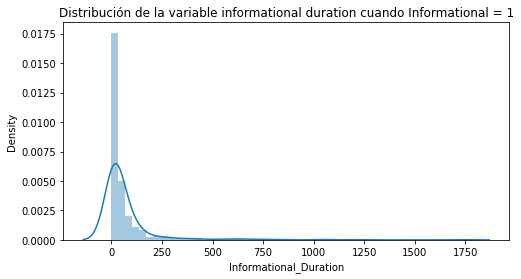

In [188]:
fig = plt.figure(figsize=(8,4))
sns.distplot(df[informational_1].Informational_Duration)
plt.title("Distribución de la variable informational duration cuando Informational = 1")
plt.show()

In [189]:
df[informational_1].Informational_Duration.mean()

69.16804655364227

In [190]:
df[informational_1].Informational_Duration.median()

22.1

Cuando tenemos una distribución "normal" utilizar la media o mediana para completar nulos no nos va a cambiar mucho.

En distribuciones con una cola larga como esta que vemos, suele ser mejor utilizar la mediana ya que la media esta sesgada por los valores extremos.

Por lo tanto, vamos a utilizar la mediana.

In [191]:
my_simple_imputer = SimpleImputer(missing_values=np.nan, strategy='median') # Este imputer considera nulos a los np.nan y utiliza la mediana para rellenar

Paso 2:


In [192]:
my_simple_imputer.fit(df[['Informational_Duration']])

SimpleImputer(strategy='median')

Paso 3:


In [193]:
df['Informational_Duration'] = my_simple_imputer.transform(df[['Informational_Duration']])

In [194]:
df.Informational_Duration.isna().sum()

0

Ahora ya completamos todos los nulos en esta columna también, pero quedan varias más.


# Ejercicio

1) Investigar fit_transform e implementarlo en el caso anterior (Informational_Duration).

2) Con lo que vimos hasta ahora, analizar las variables y decidir estrategias para completar nulos / descartar filas o columnas en cada caso.

Al finalizar, no debe haber ninguna fila con valores nulos.

In [195]:
df.isna().sum()

id                            0
Administrative                0
Administrative_Duration       0
Informational                 0
Informational_Duration        0
ProductRelated                0
ProductRelated_Duration       0
BounceRates                 863
ExitRates                   432
PageValues                    0
SpecialDay                    0
Month                         0
OperatingSystems           6905
Browser                       0
Region                       86
TrafficType                   0
VisitorType                 259
Weekend                       0
revenue                       0
dtype: int64

In [196]:
round(df.isna().mean()*100, 2)

id                          0.00
Administrative              0.00
Administrative_Duration     0.00
Informational               0.00
Informational_Duration      0.00
ProductRelated              0.00
ProductRelated_Duration     0.00
BounceRates                10.00
ExitRates                   5.01
PageValues                  0.00
SpecialDay                  0.00
Month                       0.00
OperatingSystems           80.00
Browser                     0.00
Region                      1.00
TrafficType                 0.00
VisitorType                 3.00
Weekend                     0.00
revenue                     0.00
dtype: float64

In [197]:
pd.set_option('display.max_rows', 30)

In [198]:
df["BounceRates"]

0       0.04
1        NaN
2       0.00
3       0.20
4       0.10
        ... 
8626    0.00
8627    0.00
8628    0.00
8629    0.00
8630    0.00
Name: BounceRates, Length: 8631, dtype: float64

<Figure size 576x288 with 0 Axes>

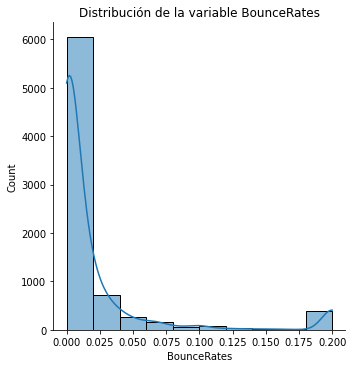

In [199]:
fig = plt.figure(figsize=(8,4))
sns.displot(df["BounceRates"], bins= 10, kde= True)
plt.title("Distribución de la variable BounceRates")
plt.show()

In [200]:
from sklearn.preprocessing import StandardScaler

In [201]:
my_scaler = StandardScaler()

In [202]:
my_scaler.fit(df[["BounceRates"]])

StandardScaler()

In [203]:
print(my_scaler.mean_)

[0.02109506]


In [204]:
my_scaler.transform(df[["BounceRates"]])

array([[ 0.4065333 ],
       [        nan],
       [-0.45362975],
       ...,
       [-0.45362975],
       [-0.45362975],
       [-0.45362975]])

In [205]:
my_simple_imputer.fit(df[["BounceRates"]])

SimpleImputer(strategy='median')

In [206]:
df["BounceRates"] = my_simple_imputer.transform(df[["BounceRates"]])

In [207]:
df.isna().sum()

id                            0
Administrative                0
Administrative_Duration       0
Informational                 0
Informational_Duration        0
ProductRelated                0
ProductRelated_Duration       0
BounceRates                   0
ExitRates                   432
PageValues                    0
SpecialDay                    0
Month                         0
OperatingSystems           6905
Browser                       0
Region                       86
TrafficType                   0
VisitorType                 259
Weekend                       0
revenue                       0
dtype: int64

In [208]:
df["ExitRates"] = my_scaler.fit_transform(df[["ExitRates"]])

In [209]:
df["ExitRates"] = my_simple_imputer.fit_transform(df[["ExitRates"]])

In [210]:
df.isna().sum()

id                            0
Administrative                0
Administrative_Duration       0
Informational                 0
Informational_Duration        0
ProductRelated                0
ProductRelated_Duration       0
BounceRates                   0
ExitRates                     0
PageValues                    0
SpecialDay                    0
Month                         0
OperatingSystems           6905
Browser                       0
Region                       86
TrafficType                   0
VisitorType                 259
Weekend                       0
revenue                       0
dtype: int64

In [211]:
df["OperatingSystems"] = my_scaler.fit_transform(df[["OperatingSystems"]])
df["OperatingSystems"] = my_simple_imputer.fit_transform(df[["OperatingSystems"]])

In [212]:
df["Region"] = my_scaler.fit_transform(df[["Region"]])
df["Region"] = my_simple_imputer.fit_transform(df[["Region"]])

In [213]:
df["VisitorType"].unique()

array(['New_Visitor', 'Returning_Visitor', 'Other', nan], dtype=object)

In [214]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [215]:
df["VisitorType"] = le.fit_transform(df["VisitorType"])

Como la columna VisitorType es categórica, usamos LabelEncoder para asignarle un número entero a cada valor y creamos un nuevo imputador que tome como valores faltantes los correspondientes a la categoría equivalente a los NaN previos a la conversión. Una vez llenos los datos, usamos inverse_transform para llevar los datos nuevamente a sus nombres originales.

In [216]:
my_simple_imputer2 = SimpleImputer(missing_values= 3, strategy= "most_frequent")

In [217]:
df["VisitorType"] = my_simple_imputer2.fit_transform(df[["VisitorType"]])

In [219]:
df["VisitorType"] = le.inverse_transform(df["VisitorType"])

In [220]:
df["VisitorType"]

0             New_Visitor
1       Returning_Visitor
2       Returning_Visitor
3       Returning_Visitor
4       Returning_Visitor
              ...        
8626    Returning_Visitor
8627    Returning_Visitor
8628    Returning_Visitor
8629          New_Visitor
8630    Returning_Visitor
Name: VisitorType, Length: 8631, dtype: object

In [222]:
df["VisitorType"].unique()

array(['New_Visitor', 'Returning_Visitor', 'Other'], dtype=object)

In [223]:
df.isna().sum()

id                         0
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
revenue                    0
dtype: int64

In [224]:
df.to_csv("online-shoppers-intention-sin-nulos.csv")